In [1]:
import ipyparams
import json

<IPython.core.display.Javascript object>

In [2]:
ds = ipyparams.params['collection']
print(ds)
dso = json.loads(ds)
# if this cell fails the first run.
# run a second time, and it works.
datasets,tools, queries =dso.get('datasets'),dso.get('tools'), dso.get('queries')
#print(f'datasets={datasets}')
#print(f'===')
for d in datasets:
    print (f'g={d.get("g")} \nname= "{d.get("name")}"  \n ====' )
ds0 = datasets[0]
#print(f'=== {ds0}')
urn = datasets[0].get('g')
ds0url = datasets[0].get('disurl')
if len(ds0url) > 0:
    url = ds0url[0]
else :
    url = ''

print(f'url={url}  urn={urn}')

{"description":{"name":"t2","brief":"Earthcube Collection"},"queries":[{"name":"steens","g":"steens"}],"tools":[],"datasets":[{"2":2,"subj":"https://www.bco-dmo.org/dataset/752737","g":"urn:gleaner2:milled:bco-dmo:969bc87032ede4f54c4618c898abddcfa29efada","resourceType":"data","name":"Dissolved nutrients from Espelandsvegen Fjord, Bergen Norway, May 2017","pubname":"Biological and Chemical Data Management Office","datep":"2021-01-06","disurl":[""]},{"0":0,"subj":"DOI:10.1594/IEDA/500036","g":"urn:gleaner2:milled:iedadata:2b496a3c21ab042e79b66beae72f99691daa77ff","resourceType":"data","name":"Processed multichannel seismic data off the eastern Greenland margin acquired during the Robert D. Conrad expedition RC2412 (1983)","pubname":"Interdisciplinary Earth Data Alliance (IEDA)","datep":"2018","disurl":["http://dx.doi.org/10.1594/IEDA/500036","http://www.marine-geo.org/tools/search/Files.php?data_set_uid=29412"]},{"3":3,"subj":"http://lipdverse.org/Temp12k/1_0_2/Svartvatnet-Norway.Seppa.

In [4]:
#https://github.com/MBcode/ec/blob/master/NoteBook/sparql.ipynb also does queries
URNs = list(map(lambda d: d.get('g'), datasets))
URNs

['urn:gleaner2:milled:bco-dmo:969bc87032ede4f54c4618c898abddcfa29efada',
 'urn:gleaner2:milled:iedadata:2b496a3c21ab042e79b66beae72f99691daa77ff',
 'urn:gleaner2:milled:lipdverse:509e465d0793506b237cea8069c3cb2d276fe9c2',
 'urn:gleaner:milled:earthchem:401611118aeb430f9eef19c475be66cf700c5015']

In [5]:
import httpimport
with httpimport.github_repo('earthcube', 'earthcube_utilities'):
    import earthcube_utilities as ec
ec.local()
#ec.wget_rdf(urn)
dfRDFs=list(map(ec.wget_rdf, URNs))
#!ls -l, to see it
dfRDFs[0] #you can look at others (beyond 0)if there

,<https://www.bco-dmo.org/dataset-parameter/835428>,<http://www.w3.org/1999/02/22-rdf-syntax-ns
<https://www.bco-dmo.org/dataset-parameter/835428>,<https://schema.org/alternateName>,depth .
<https://www.bco-dmo.org/dataset-parameter/835428>,<https://schema.org/description>,sampling depth .
<https://www.bco-dmo.org/dataset-parameter/835428>,<https://schema.org/name>,Depth .
<https://www.bco-dmo.org/dataset-parameter/835428>,<https://schema.org/unitText>,meters .
<https://www.bco-dmo.org/parameter/808>,<http://www.w3.org/1999/02/22-rdf-syntax-ns,NaN
...,...,...
<https://www.bco-dmo.org/parameter/489066>,<https://schema.org/name>,treatment .
<https://www.bco-dmo.org/parameter/489066>,<https://schema.org/propertyID>,https://www.bco-dmo.org/parameter/ .
<https://www.bco-dmo.org/parameter/960>,<http://www.w3.org/1999/02/22-rdf-syntax-ns,NaN
<https://www.bco-dmo.org/parameter/960>,<https://schema.org/name>,sample identification .


In [6]:
#Get resource download URL from the metadata
ds_urls,ds_url= ec.getDatasetURLs(URNs) #if d1 else ec.getDatasetURLs(dRows,dfSPARQL) 
ds_urls #list of dataset's urls ;can use 1st or filter by ext ..

grep2obj:969bc87032ede4f54c4618c898abddcfa29efada.nt
grep2obj:2b496a3c21ab042e79b66beae72f99691daa77ff.nt
grep2obj:509e465d0793506b237cea8069c3cb2d276fe9c2.nt
grep2obj:401611118aeb430f9eef19c475be66cf700c5015.nt


[['https://darchive.mblwhoilibrary.org/bitstream/1912/26532/3/Dataset_description.pdf',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/26532/1/dataset-752737_bergen-mesohux-2017-dissolved-nutrients__v1.tsv',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/26532/4/NOAA_ISO19115-2.xml',
  'https://darchive.mblwhoilibrary.org/bitstream/1912/26532/2/dataset-752737_bergen-mesohux-2017-dissolved-nutrients__v1_README.txt',
  ''],
 ['http://dx.doi.org/10.1594/IEDA/500036',
  'http://www.marine-geo.org/tools/search/Files.php?data_set_uid=29412',
  ''],
 ['http://lipdverse.org/Temp12k/1_0_2/Svartvatnet-Norway.Seppa.2009.lpd', ''],
 ['https://ecl.earthchem.org/view.php?id=1473', '']]

In [7]:
#Filter URLs to download, if you want:
ext='.tsv' #you can pick
ds_url=ec.collect_ext(ds_urls,ext)
#Download the resource
#df=ec.read_file(url,ext) #can cut+paste one you want to see, or get them all:
DFs=list(map(lambda u: ec.read_file(u,ext), ds_url)) #you can look at separately below
ds_url


['https://darchive.mblwhoilibrary.org/bitstream/1912/26532/1/dataset-752737_bergen-mesohux-2017-dissolved-nutrients__v1.tsv']

In [8]:
DFs

[            Treatment Bag  Depth Depth_description        Date  \
 0             Ambient   1      5              deep  2017-05-14   
 1             Ambient   1      5              deep  2017-05-15   
 2             Ambient   1      5              deep  2017-05-16   
 3             Ambient   1      5              deep  2017-05-17   
 4             Ambient   1      5              deep  2017-05-18   
 ..                ...  ..    ...               ...         ...   
 421  Redfield; Shaded  11      1           surface  2017-05-26   
 422  Redfield; Shaded  11      1           surface  2017-05-27   
 423  Redfield; Shaded  11      1           surface  2017-05-28   
 424  Redfield; Shaded  11      1           surface  2017-05-29   
 425  Redfield; Shaded  11      1           surface  2017-05-30   
 
     Nitrate_Nitrite_uM Ammonium_uM Orthophosphate_uM  
 0                   nd          nd                nd  
 1                   nd          nd                nd  
 2                   nd   

In [9]:
!ls -l

total 272
-rw-r--r-- 1 jovyan jovyan 11784 Jul 27 17:38 2b496a3c21ab042e79b66beae72f99691daa77ff.nt
-rw-r--r-- 1 jovyan jovyan 11784 Jun  4 12:52 2b496a3c21ab042e79b66beae72f99691daa77ff.rdf
-rw-r--r-- 1 jovyan jovyan 35689 Jul 27 17:38 401611118aeb430f9eef19c475be66cf700c5015.nt
-rw-r--r-- 1 jovyan jovyan 35689 Jun 12 22:44 401611118aeb430f9eef19c475be66cf700c5015.rdf
-rw-r--r-- 1 jovyan jovyan  3662 Jul 27 17:38 509e465d0793506b237cea8069c3cb2d276fe9c2.nt
-rw-r--r-- 1 jovyan jovyan  3662 Jun  4 12:57 509e465d0793506b237cea8069c3cb2d276fe9c2.rdf
-rw-r--r-- 1 jovyan jovyan 22690 Jul 27 17:38 969bc87032ede4f54c4618c898abddcfa29efada.nt
-rw-r--r-- 1 jovyan jovyan 22690 Jun  4 12:49 969bc87032ede4f54c4618c898abddcfa29efada.rdf
-rw-r--r-- 1 jovyan jovyan 22690 Jun  4 12:49 969bc87032ede4f54c4618c898abddcfa29efada.rdf.1
-rw-r--r-- 1 jovyan jovyan    23 Jul 11 21:51 apt.txt
-rw-r--r-- 1 jovyan jovyan 14974 Jul 27 17:39 collection.ipynb
drwxr-xr-x 2 jovyan jovyan  4096 Jul 11 21:51 config
-rw

rapper: Parsing URI file:///home/jovyan/401611118aeb430f9eef19c475be66cf700c5015.nt with parser ntriples
rapper: Serializing with serializer dot
rapper: Parsing returned 419 triples


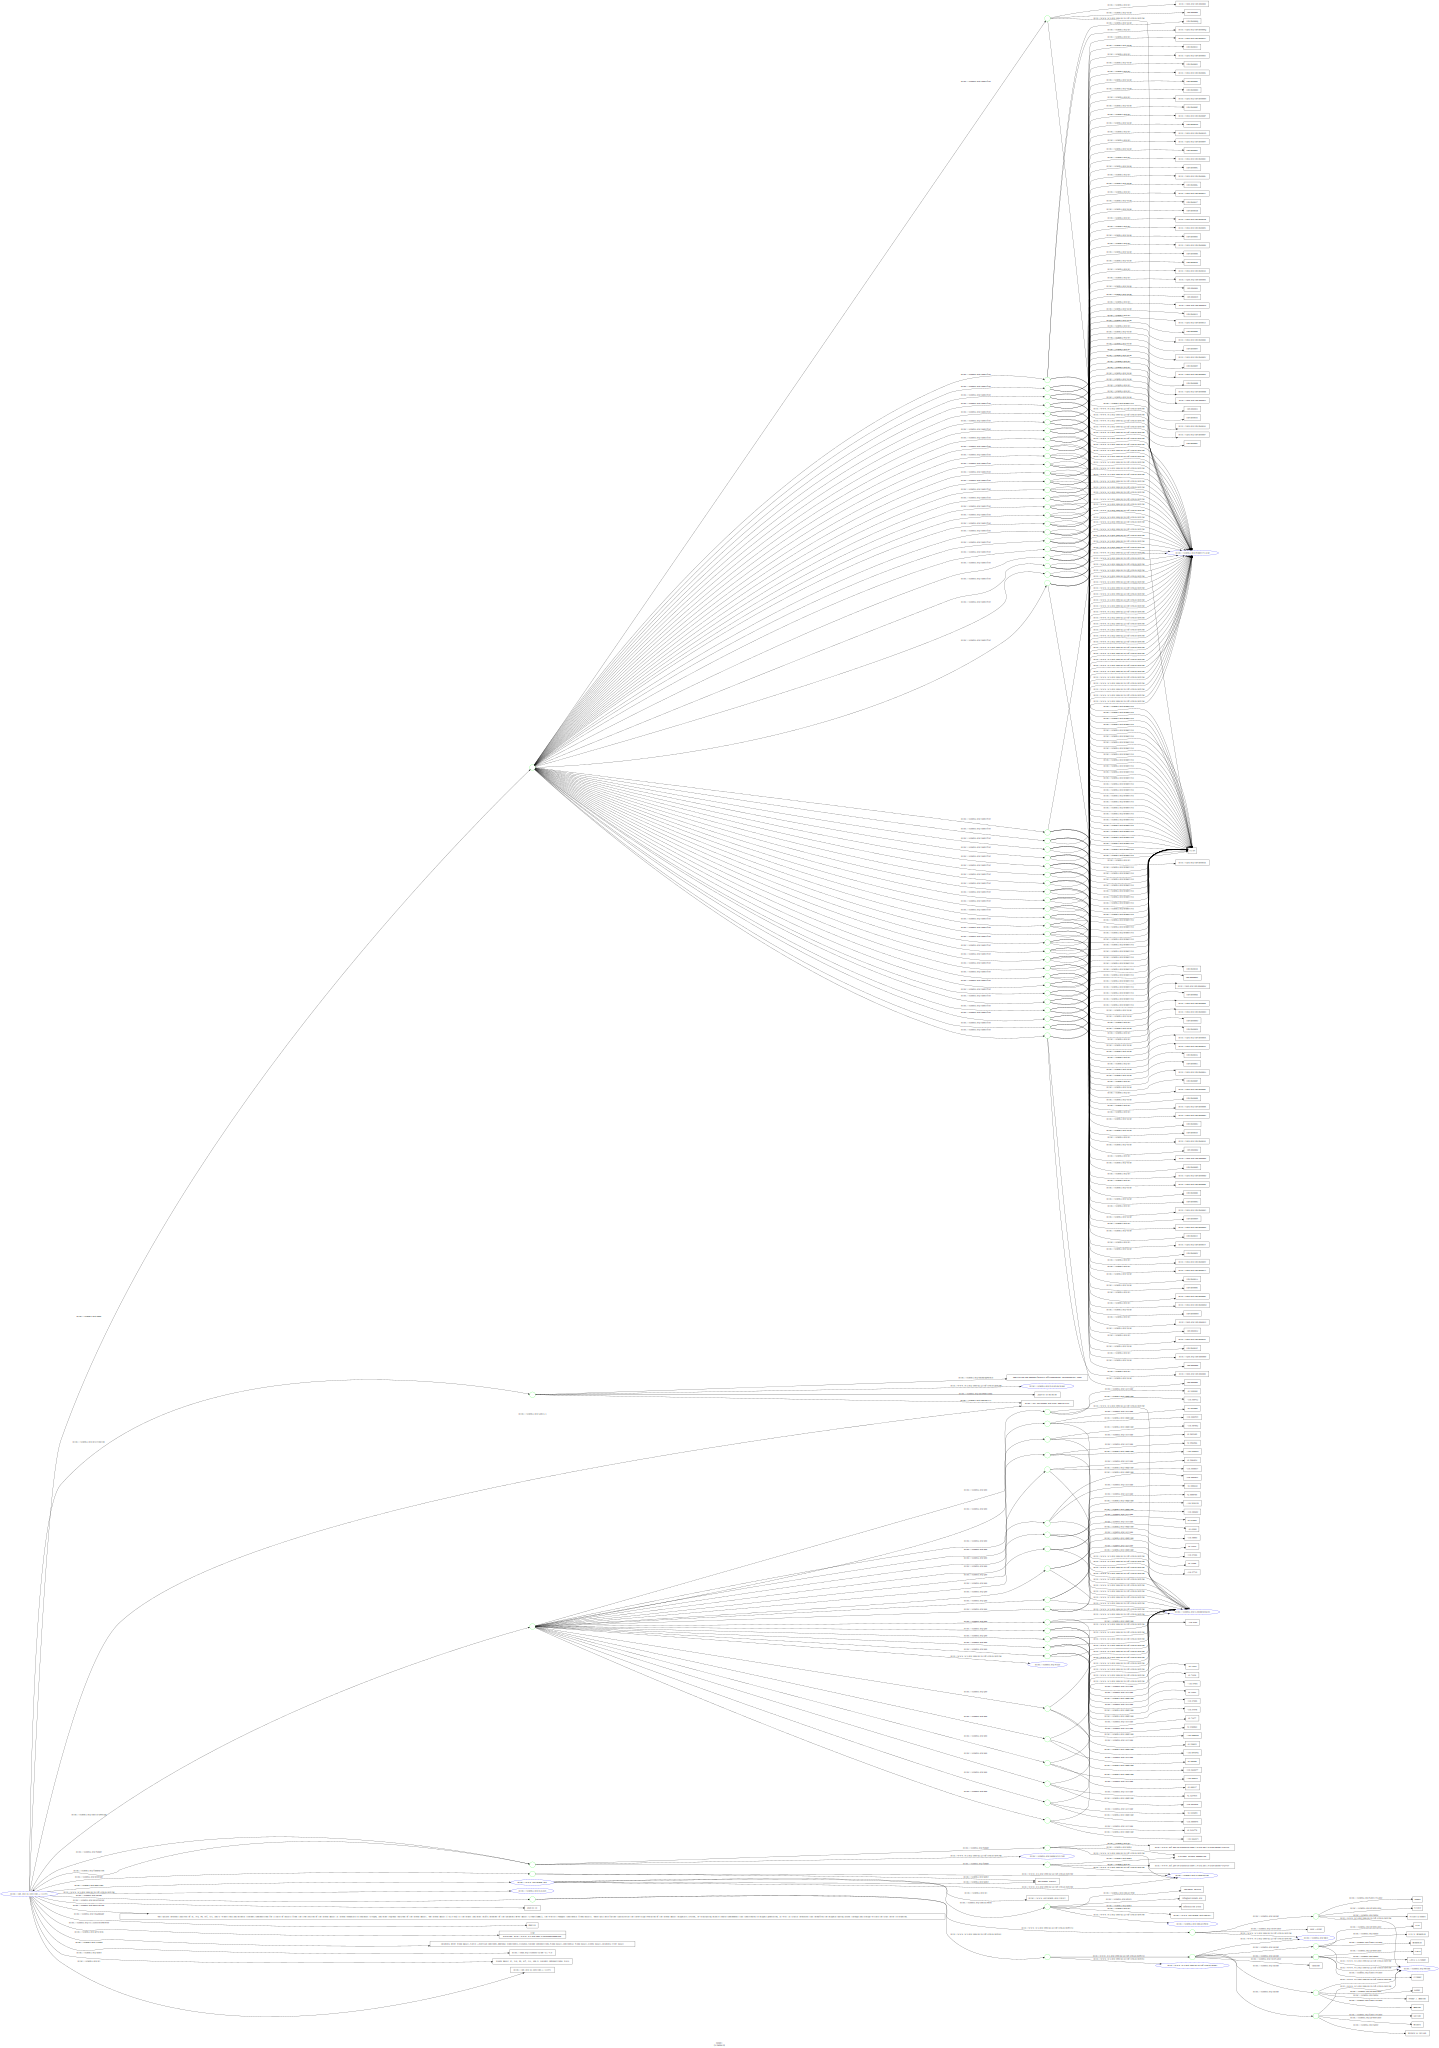

In [10]:
ec.viz()